In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [87]:
np.random.seed(42)

data_size = 50
experience = np.random.randint(1, 21, size = data_size)
education = np.random.randint(1, 5, size = data_size)

noise = np.random.normal(0, 500000, size=data_size)
salary = np.round(1000000 * experience + 500000 * education + noise).astype(int)

df = pd.DataFrame({
    "Experience" : experience,
    "Education" : education,
    "Salary" : salary
})

df

,Experience,Education,Salary
0,7,4,8661539
1,20,4,22305838
2,15,2,16515500
3,11,2,12465640
4,8,2,8580391
5,7,2,7845394
6,19,2,20165632
7,11,4,13487773
8,11,2,11760413
9,4,1,4407171


In [88]:
x = df[["Experience", "Education"]] # data fitur
y = df[["Salary"]]

scaler_x = MinMaxScaler()
x_scale = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_scale = scaler_y.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=42)

In [89]:
# linear regression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

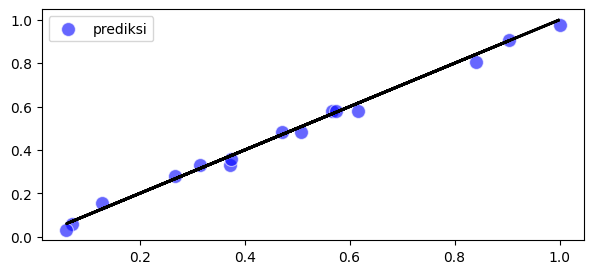

In [90]:
plt.figure(figsize=(7,3))
sns.scatterplot(x = y_test, y = y_pred, color = "blue", alpha = 0.6, s = 100, label = "prediksi")
plt.plot(y_test, y_test, color = "black", linewidth = 2, label = "Actual")
plt.show()

In [91]:
model.score(x_test, y_test)

0.992814325133279

In [92]:
new_data = pd.DataFrame({
    "Experience" : [1,10,5],
    "Education" : [1,2,2]
})

new_data_scale = scaler_x.transform(new_data)
prediction_norm = model.predict(new_data_scale)
prediction = scaler_y.inverse_transform(prediction_norm.reshape(-1,1))

new_data["Salary"] = np.round(prediction.ravel()).astype(int)

new_data

,Experience,Education,Salary
0,1,1,1332625
1,10,2,10928150
2,5,2,5871047


Assignment

In [93]:
# no 1

df = pd.read_csv("covid19-2.csv")
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


In [94]:
df.isnull().sum()

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64

In [95]:
# no 2

df.fillna(0, inplace=True)
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
Continent            0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [96]:
# no 3

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler_df = LabelEncoder()
df["Country_encoded"] = scaler_df.fit_transform(df["Country"])
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_encoded
0,2020-01-05,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,0.0,5740,238
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740,238
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740,238
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,0.0,266387,0.0,5740,238


In [97]:
# no 4

x = df[["Country_encoded", "New_deaths", "Cumulative_cases"]]
y = df[["Cumulative_deaths"]]

norm_df = MinMaxScaler()
y_norm = norm_df.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_norm, test_size=0.2, random_state=42)

print(f"x train = {len(x_train)}, x test = {len(x_test)}")
print(f"y train = {len(y_train)}, y test = {len(y_test)}")

x train = 46848, x test = 11712
y train = 46848, y test = 11712


In [98]:
model_df = LinearRegression()
model_df.fit(x_train, y_train)

y_pred = model_df.predict(x_test)

In [99]:
model_df.score(x_test, y_test)

0.6356318949099882